<a href="https://colab.research.google.com/github/AnaRecio/G2M-Insight/blob/main/UseCaseCabInvestment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

## Data Extraction

In [2]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv'
Cab_Data_df= pd.read_csv(url)
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [3]:
Cab_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [4]:
## Checking if the city names are the same so I can merge with City dataset
Cab_Data_df['City'].unique()

array(['ATLANTA GA', 'AUSTIN TX', 'BOSTON MA', 'CHICAGO IL', 'DALLAS TX',
       'DENVER CO', 'LOS ANGELES CA', 'MIAMI FL', 'NASHVILLE TN',
       'NEW YORK NY', 'ORANGE COUNTY', 'PHOENIX AZ', 'PITTSBURGH PA',
       'SACRAMENTO CA', 'SAN DIEGO CA', 'SEATTLE WA', 'SILICON VALLEY',
       'TUCSON AZ', 'WASHINGTON DC'], dtype=object)

In [5]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv'
City_df= pd.read_csv(url)
City_df.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [6]:
City_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [7]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv'
Customer_ID_df= pd.read_csv(url)
Customer_ID_df.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
Customer_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [9]:
url = 'https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv'
Transaction_ID_df= pd.read_csv(url)
Transaction_ID_df.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
Transaction_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [11]:
duplicated_transaction_ID = Transaction_ID_df[Transaction_ID_df['Transaction ID'].duplicated()]
duplicated_transaction_ID

,Transaction ID,Customer ID,Payment_Mode


## Transformation

In [12]:
##Merging Cab_Data with Transaction_ID
Cab_Data_df = pd.merge(Cab_Data_df,Transaction_ID_df, how='left' )
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [13]:
##Merging Cab_Data with Customer_ID
Cab_Data_df = pd.merge(Cab_Data_df,Customer_ID_df, how='left' )
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [14]:
##Merging Cab_Data with City
Cab_Data_df = pd.merge(Cab_Data_df,City_df, how='left' )
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [15]:
Cab_Data_df.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

In [16]:
##Ordering the columns so they make more sense
Cab_Data_df = Cab_Data_df[['Transaction ID', 'Date of Travel', 'Company', 'City', 'Population', 'Users', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID',
       'Gender', 'Age', 'Income (USD/Month)', 'Payment_Mode']]
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,42377,Pink Cab,ATLANTA GA,"814,885","24,701",30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,42375,Pink Cab,ATLANTA GA,"814,885","24,701",28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,42371,Pink Cab,ATLANTA GA,"814,885","24,701",9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,42376,Pink Cab,ATLANTA GA,"814,885","24,701",33.17,377.40,351.602,28020,Male,23,23327,Cash
4,10000015,42372,Pink Cab,ATLANTA GA,"814,885","24,701",8.73,114.62,97.776,27182,Male,33,8536,Card


In [17]:
##Changing the format of date so it is correct
def excel_date_to_datetime(excel_date):
    return datetime(1899, 12, 31) + timedelta(days=excel_date-1)

Cab_Data_df['Date of Travel'] = Cab_Data_df['Date of Travel'].apply(excel_date_to_datetime)
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,"814,885","24,701",30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,"814,885","24,701",28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,"814,885","24,701",9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,"814,885","24,701",33.17,377.40,351.602,28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,"814,885","24,701",8.73,114.62,97.776,27182,Male,33,8536,Card


In [18]:
print(Cab_Data_df.shape)
print(Cab_Data_df.size)

(359392, 14)
5031488


##EDA

In [19]:
Cab_Data_df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


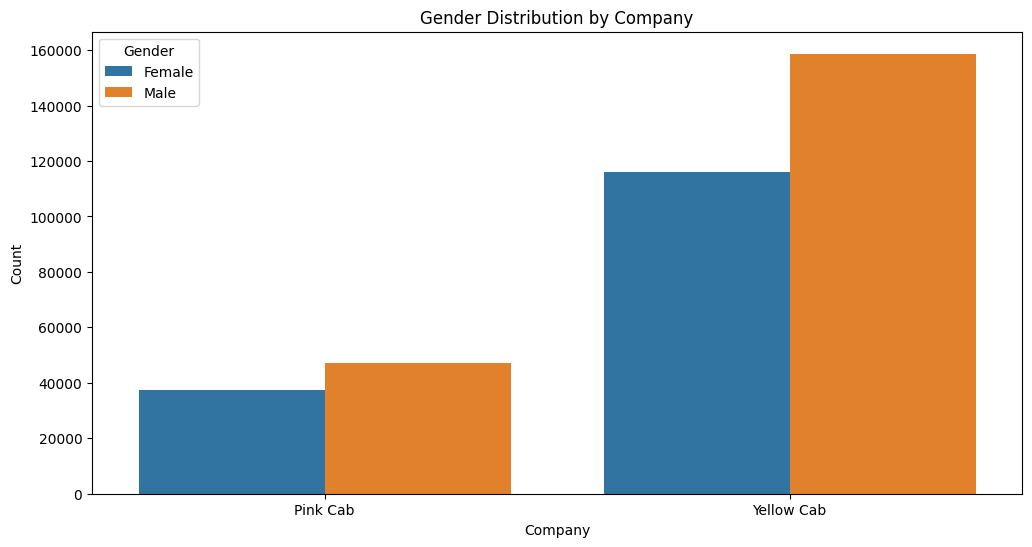

      Company  Gender   Count
0    Pink Cab  Female   37480
1    Pink Cab    Male   47231
2  Yellow Cab  Female  116000
3  Yellow Cab    Male  158681


In [20]:
##Analyze the company chosen by Gender
Gender_Grouped = Cab_Data_df.groupby(['Company', 'Gender']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Count", hue="Gender", data=Gender_Grouped)

plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Gender Distribution by Company")


plt.legend(title='Gender')
plt.show()
print(Gender_Grouped)

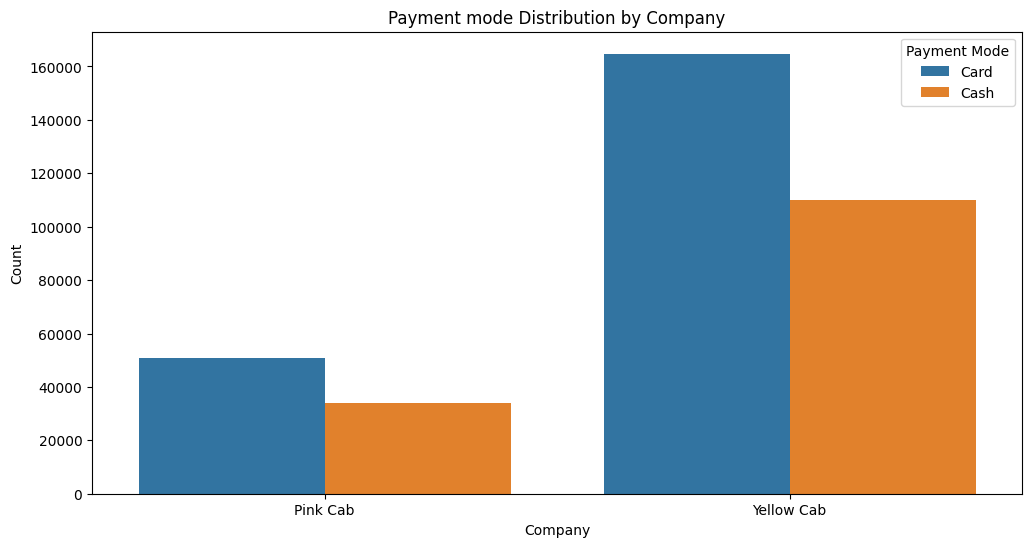

      Company Payment_Mode   Count
0    Pink Cab         Card   50719
1    Pink Cab         Cash   33992
2  Yellow Cab         Card  164785
3  Yellow Cab         Cash  109896


In [21]:
##Analyze the company chosen by Payment Mode
Payment_Grouped = Cab_Data_df.groupby(['Company', 'Payment_Mode']).size().reset_index(name='Count')

plt.figure(figsize=(12, 6))
sns.barplot(x="Company", y="Count", hue="Payment_Mode", data=Payment_Grouped)

plt.xlabel("Company")
plt.ylabel("Count")
plt.title("Payment mode Distribution by Company")


plt.legend(title='Payment Mode')
plt.show()
print(Payment_Grouped)

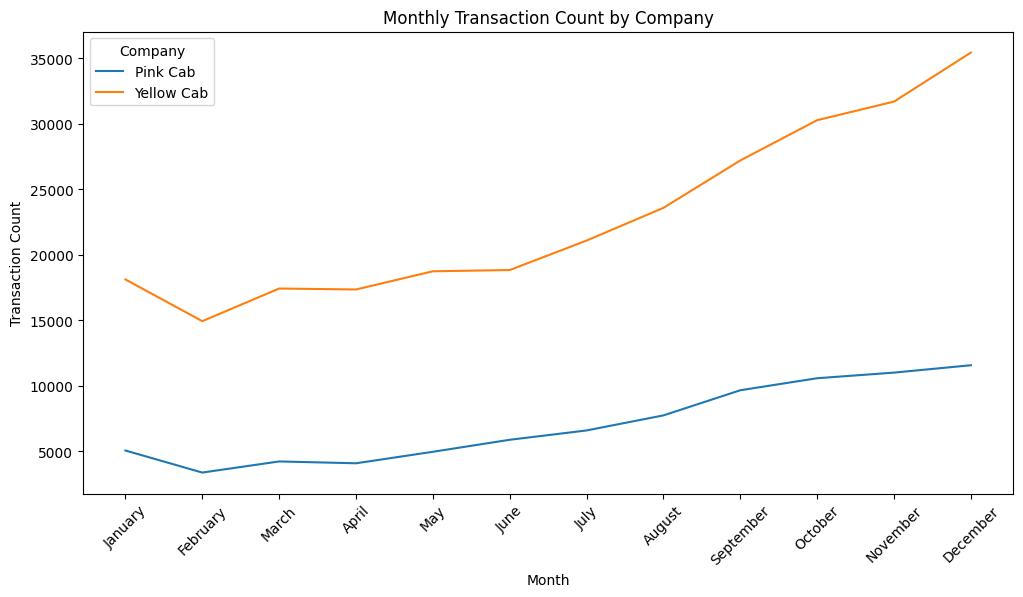

In [22]:
## Analyze the amount of transactions on each company by month
## First I extracted the month from Date of Travel

copy_df=Cab_Data_df.copy()
copy_df['Month'] = copy_df['Date of Travel'].dt.month_name()
cats = ['January', 'February', 'March', 'April','May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
copy_df['Month'] = pd.Categorical(copy_df['Month'], ordered=True, categories=cats)

Month_Grouped = copy_df.groupby(['Company', 'Month'])['Transaction ID'].count().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=Month_Grouped, x="Month", y="Transaction ID", hue='Company')

plt.xticks(rotation=45)

plt.ylabel("Transaction Count")
plt.title("Monthly Transaction Count by Company")

plt.legend(title='Company')
plt.show()


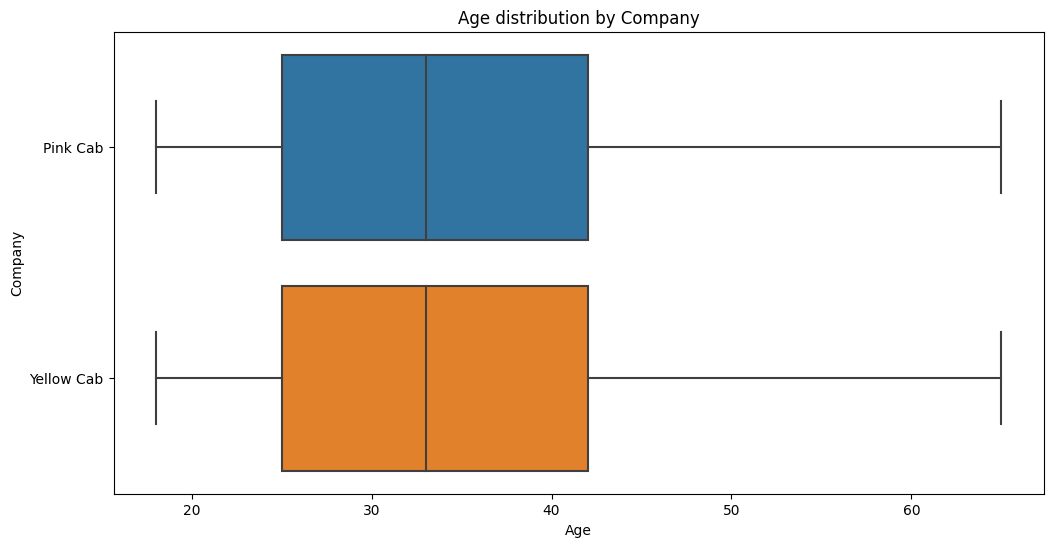

In [23]:
##Analyze the age distribution by company
plt.figure(figsize=(12, 6))
sns.boxplot(data=Cab_Data_df, x="Age", y="Company");

plt.title("Age distribution by Company")

plt.show();

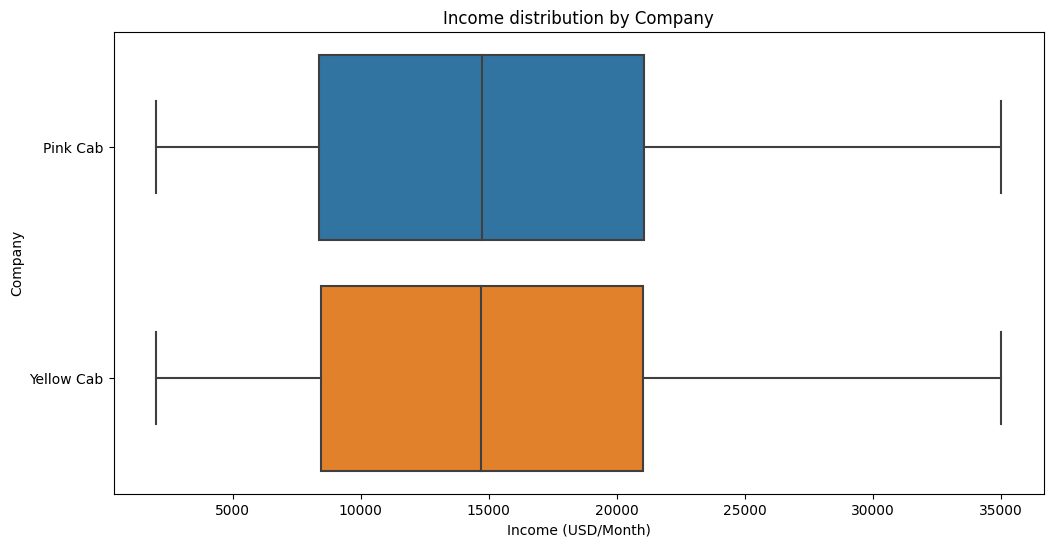

In [24]:
##Analyze the income distribution by company
plt.figure(figsize=(12, 6))
sns.boxplot(data=Cab_Data_df, x="Income (USD/Month)", y="Company")

plt.title("Income distribution by Company")

plt.show();

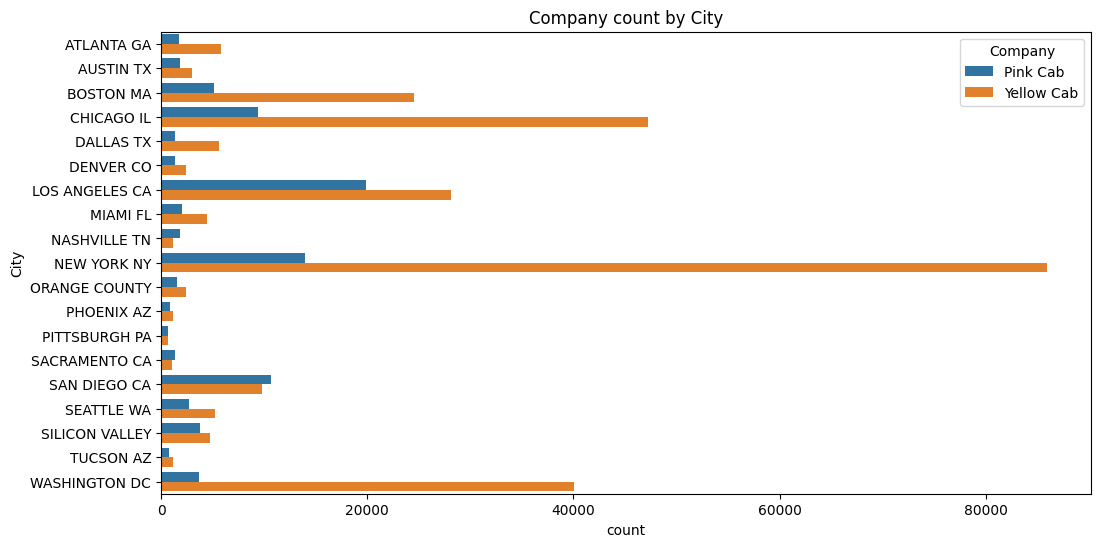

In [25]:
## Analyze the amount of transaction by company by city
plt.figure(figsize=(12, 6))
sns.countplot(data=Cab_Data_df, y="City", hue="Company")
plt.title("Company count by City")

plt.show();

#Feature Engineering

In [26]:
Cab_Data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   Population          359392 non-null  object        
 5   Users               359392 non-null  object        
 6   KM Travelled        359392 non-null  float64       
 7   Price Charged       359392 non-null  float64       
 8   Cost of Trip        359392 non-null  float64       
 9   Customer ID         359392 non-null  int64         
 10  Gender              359392 non-null  object        
 11  Age                 359392 non-null  int64         
 12  Income (USD/Month)  359392 non-null  int64         
 13  Payment_Mode        359392 no

In [27]:
Cab_Data_df.head()

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,"814,885","24,701",30.45,370.95,313.635,29290,Male,28,10813,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,"814,885","24,701",28.62,358.52,334.854,27703,Male,27,9237,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,"814,885","24,701",9.04,125.20,97.632,28712,Male,53,11242,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,"814,885","24,701",33.17,377.40,351.602,28020,Male,23,23327,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,"814,885","24,701",8.73,114.62,97.776,27182,Male,33,8536,Card


In [28]:
df_final = Cab_Data_df.copy()

In [29]:
min_age = df_final['Age'].min()
med_age = df_final['Age'].median()
max_age = df_final['Age'].max()

print('Minimum age'+ " " +str(min_age ))
print('Median age'+ " " + str(med_age ))
print('Maximum age'+ " " +str(max_age ))

Minimum age 18
Median age 33.0
Maximum age 65


In [30]:
min_income = df_final['Income (USD/Month)'].min()
med_income= df_final['Income (USD/Month)'].median()
max_income = df_final['Income (USD/Month)'].max()

print('Minimum Income'+ " " +str(min_income ))
print('Median Income'+ " " + str(med_income ))
print('Maximum Income'+ " " +str(max_income ))

Minimum Income 2000
Median Income 14685.0
Maximum Income 35000


In [31]:
## Creating groups for age and income
age_bins = [0, 30, 45, float('inf')]
age_labels = ['Young', 'Young Adult', 'Old']


income_bins = [0, 5000, 12000, float('inf')]
income_labels = ['Low Income', 'Middle Income', 'High Income']



df_final['Age_Bin'] = pd.cut(df_final['Age'], bins=age_bins, labels=age_labels, right=False)
df_final['Income_Bin'] = pd.cut(df_final['Income (USD/Month)'], bins=income_bins, labels=income_labels, right=False)

df_final.head()

,Transaction ID,Date of Travel,Company,City,Population,Users,KM Travelled,Price Charged,Cost of Trip,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode,Age_Bin,Income_Bin
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,"814,885","24,701",30.45,370.95,313.635,29290,Male,28,10813,Card,Young,Middle Income
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,"814,885","24,701",28.62,358.52,334.854,27703,Male,27,9237,Card,Young,Middle Income
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,"814,885","24,701",9.04,125.20,97.632,28712,Male,53,11242,Cash,Old,Middle Income
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,"814,885","24,701",33.17,377.40,351.602,28020,Male,23,23327,Cash,Young,High Income
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,"814,885","24,701",8.73,114.62,97.776,27182,Male,33,8536,Card,Young Adult,Middle Income


In [32]:
df_final['Month'] = df_final['Date of Travel'].dt.month

In [33]:
df_final['Price per KM'] = (df_final['Price Charged'] / df_final['KM Travelled']).round()

In [34]:
df_final = df_final.drop(columns=['Transaction ID', 'Date of Travel','Users','Population', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID'])

df_final.head()

,Company,City,Gender,Age,Income (USD/Month),Payment_Mode,Age_Bin,Income_Bin,Month,Price per KM
0,Pink Cab,ATLANTA GA,Male,28,10813,Card,Young,Middle Income,1,12.0
1,Pink Cab,ATLANTA GA,Male,27,9237,Card,Young,Middle Income,1,13.0
2,Pink Cab,ATLANTA GA,Male,53,11242,Cash,Old,Middle Income,1,14.0
3,Pink Cab,ATLANTA GA,Male,23,23327,Cash,Young,High Income,1,11.0
4,Pink Cab,ATLANTA GA,Male,33,8536,Card,Young Adult,Middle Income,1,13.0


In [35]:
## created a new df to convert variables to codes so I can proceed with a correlation map
from sklearn.preprocessing import LabelEncoder

categorical_columns = ["City", "Gender", "Company", "Payment_Mode", "Age_Bin", "Income_Bin", "Price per KM", "Month"]

label_encoders = {col: LabelEncoder() for col in categorical_columns}

df_encoded = pd.DataFrame()

for col in categorical_columns:
    df_encoded[col] = label_encoders[col].fit_transform(df_final[col])

df_encoded.head()


,City,Gender,Company,Payment_Mode,Age_Bin,Income_Bin,Price per KM,Month
0,0,1,0,0,1,2,6,0
1,0,1,0,0,1,2,7,0
2,0,1,0,1,0,2,8,0
3,0,1,0,1,1,0,5,0
4,0,1,0,0,2,2,7,0


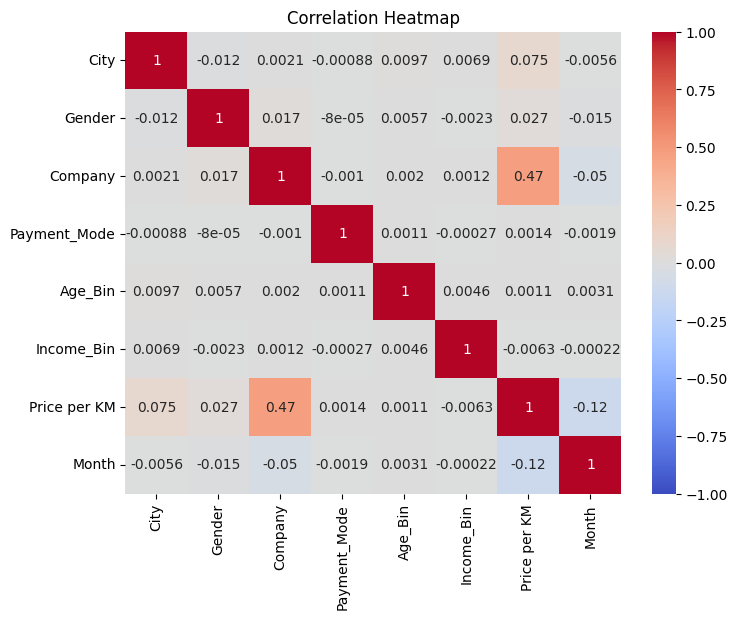

In [36]:
## Correlation map to see the relationship among variables
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show();

## Hypothesis Testing

1. Determine whether Price per KM and Month are independent.
Perform a Chi-Squared test for independence

*   Null hypothesis (H0): There is no association between "Price per KM" and "Month." The two variables are independent.
*  Alternative Hypothesis (H1): There is an association between "Price per KM" and "Month." The two variables are dependent.


In [37]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_final['Price per KM'], df_final['Month'])

chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between Price per KM and Month.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Price per KM and Month.")

Chi-squared statistic: 32367.54290783439
P-value: 0.0
Reject the null hypothesis. There is a significant association between Price per KM and Month.


2. Determine if there is a difference on the mean income of users in the two cities with more users. Perform a two-sample t-test


*   Null hypothesis (H0): There is no difference in the mean income of users between New York and Chicago
*  Alternative hypotheis (H1): There is a difference in the mean income of users between New York and Chicago



In [38]:
from scipy import stats

In [39]:
NY = df_final[df_final['City'] == "NEW YORK NY"]
CH = df_final[df_final['City'] == "CHICAGO IL"]

In [40]:
Sample_NY = NY.sample(n=20, replace=True, random_state=42)
Sample_CH = CH.sample(n=20, replace=True, random_state=42)

In [41]:
t_stat, p_value = stats.ttest_ind(a=Sample_NY ['Income (USD/Month)'], b=Sample_CH['Income (USD/Month)'], equal_var=False)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean income between New York and Chicago.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean income between New York and Chicago.")

T-statistic: 0.1264059855234746
P-value: 0.900127872157698
Fail to reject the null hypothesis. There is no significant difference in mean income between New York and Chicago.


3. Determine if there is a significant association between the age groups and the preference for a company. Perform a Chi-Squared test for independence


*   Null Hypothesis (H0): There is no association between age groups and the preference for a company. In other words, age and company preference are independent.
*   Alternative Hypothesis (H1): There is an association between age groups and the preference for a company. In other words, age and company preference are dependent.


In [42]:
contingency_table = pd.crosstab(df_final['Age_Bin'], df_final['Company'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between age groups and company preference.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between age groups and company preference.")

Chi-squared statistic: 4.373978949895864
P-value: 0.11225418446747176
Fail to reject the null hypothesis. There is no significant association between age groups and company preference.


4.Determine whether there is a significant association between Gender and the company of choice. Perform a chi-squared test for independence.



*   Null Hypothesis (H0): There is no association between gender and the choice of company. In other words, gender and company choice are independent.
*   Alternative Hypothesis (H1): There is an association between gender and the choice of company. In other words, gender and company choice are dependent.



In [43]:
contingency_table = pd.crosstab(df_final['Gender'], df_final['Company'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between gender and the choice of company.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between gender and the choice of company.")

Chi-squared statistic: 107.22063897254299
P-value: 3.982674650131372e-25
Reject the null hypothesis. There is a significant association between gender and the choice of company.


5. Determine if there is a significant association between the income groups and the preference for a company. Perform a Chi-Squared test for independence

*   Null Hypothesis (H0): There is no association between income groups and the preference for a company. In other words, income and company preference are independent.
*    Alternative Hypothesis (H1): There is an association between income groups and the preference for a company. In other words, income and company preference are dependent.  


In [44]:
contingency_table = pd.crosstab(df_final['Income_Bin'], df_final['Company'])

chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-squared statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between income groups and company preference.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between income groups and company preference.")

Chi-squared statistic: 2.593327444398195
P-value: 0.27344255323488537
Fail to reject the null hypothesis. There is no significant association between income groups and company preference.


6. Identify if there is a significant diference in the mean Price per KM among different companies. Perform a one way ANOVA

*   Null Hypothesis (H0): There is no significant difference in the mean Price per KM among the two companies. In other words, the choice of company does not affect the Price per KM.
*   Alternative Hypothesis (H1): There is a significant difference in the mean Price per KM among the different companies. In other words, the choice of company does affect the Price per KM.
  


In [45]:
price_Pink = df_final[df_final['Company'] == 'Pink Cab']['Price per KM']
price_Yellow = df_final[df_final['Company'] == 'Yellow Cab']['Price per KM']

f_statistic, p_value = stats.f_oneway(price_Pink , price_Yellow)

alpha = 0.05

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean Price per KM among the different companies.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean Price per KM among the different companies.")

F-statistic: 102699.08762904652
P-value: 0.0
Reject the null hypothesis. There is a significant difference in mean Price per KM among the different companies.


##Recommendations



    Seasonality and Price per KM:
        It appears that there is a relationship between the price per KM and the month, which could be attributed to seasonality.
        It's crucial to investigate if both companies exhibit similar seasonality trends to determine whether the season has an influence on the choice of the company based on price.
        Further analysis should explore the specific patterns and differences in price per KM for each company across different months.

    Age and Income vs. Company Selection:
        The hypothesis testing suggests that neither age nor income have a significant influence on the choice of the company.
        These variables may not be strong predictors for determining which company users choose.
        While they may not directly impact company selection, it's important to consider other factors or interactions that could influence user choices.

    Gender and Company Selection:
        Despite a seemingly low correlation in the correlation matrix, the Chi-Squared test reveals a significant association between gender and the choice of the company.
        This finding suggests that gender could be a more influential feature in predicting the company chosen by users than initially expected.
        A deeper analysis of gender-based preferences and marketing strategies may provide valuable insights into user behavior.

    Price per KM as a Predictive Feature:
        Price per KM shows the highest correlation with the choice of company, and the ANOVA test confirms a significant difference in mean price per KM between the two companies.
        This variable is likely a key feature that can be used to predict the company chosen by users with higher accuracy.
        Future modeling and predictive analytics should prioritize the inclusion of price per KM as a predictive feature in company selection models.




